<font color=navy size=6>**Entradas de sistemas atómico-moleculares pyscf**
    
<font color=navy size=5>**Enrique Mejía Ospino**
    
<font color=navy size=5>**Química Cuántica Avanzada**
    
<font color=navy size=5>**Universidad Industrial de Santander**

In [9]:
import numpy as np
from pyscf import *
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
mol = gto.Mole()
mol.atom ='''
O 0 0 0
H 0 1 0
H 0 0 1
'''

In [33]:
mol = gto.Mole()
mol.atom = '''
    O
    H  1  1.2
    H  1  1.2  2 105
'''

In [16]:
mol.atom = '''
    O
    H  1  1.2
    H  r  1.2  2 105
r=1'''

In [27]:
mol = gto.Mole()
mol.atom='''
N
N 1 rNN
H 1 rNH 2 aHNN
H 2 rNH 1 aHNN 3 180.0

rNH  = 1.0
rNN  = 1.4
aHNN = 140.0'''

In [15]:
mol = gto.Mole()
mol.atom = '''8 0 0 0; h 0 1 0; H 0 0 1'''

<font color=black size=4>**Las moléculas pueden ser importadas de un archivo en formato *xyz* y convertidas en una geometría de *pyscf* muy facilemente de esta forma:**

In [37]:
mol = gto.Mole()
mol.atom='./molecules/benzene.xyz'

<font color=navy size=5>**Importación y Graficación de Moléculas**

<font color=green size=4>**Otra alternativa es utilizar el formato *SMILE*, existe un modulo llamado *RDkit* que, entre otras cosas, puede leer, graficar geometrías moleculares en este formato y convertirlas en geometrías de *xyz* que pueden ser leídas en *pyscf*, aquí va un ejemplo:**

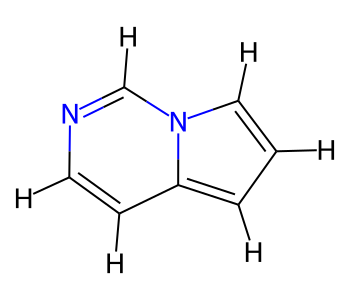

In [64]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 350,300
doravirine = Chem.MolFromSmiles('c1nccc2n1ccc2')
doravirine = Chem.AddHs(doravirine)
AllChem.EmbedMolecule(doravirine)
AllChem.MMFFOptimizeMolecule(doravirine)
doravirine

In [65]:
Chem.rdmolfiles.MolToXYZFile(doravirine, './molecules/dor.xyz')
mol = gto.Mole()
mol.atom= './molecules/dor.xyz'
mol.build()
rhf_dor = scf.RHF(mol)
e_h2o = rhf_dor.kernel()

converged SCF energy = -372.756320144927


In [44]:
print(Chem.MolToXYZBlock(doravirine))

15

C     -1.130406    1.353163   -0.324450
N     -2.261360    0.706990   -0.329819
C     -2.194384   -0.654824   -0.106035
C     -1.067736   -1.355953    0.113953
C      0.162501   -0.659632    0.120865
N      0.082181    0.697107   -0.103389
C      1.347252    1.233229   -0.067548
C      2.236974    0.207930    0.181434
C      1.486806   -0.990996    0.300846
H     -1.109336    2.440955   -0.496054
H     -3.151737   -1.171242   -0.115453
H     -1.095048   -2.426830    0.282238
H      1.507456    2.291735   -0.221090
H      3.311403    0.310568    0.268127
H      1.875435   -1.982201    0.496375



<font color=orange size=4>**Uno de los modulas más utilizados para grafica moléculas en *python* es *py3Dmol*, aquí construimos una función basdos en este modulo, que nos permitirá graficar las moléculas ue deseamos trabajar con MC:**

In [78]:
import py3Dmol as p3d

def drawPsi4Geom(mol):
    xyz = mol 
    view = p3d.view(width=400, height=400)
    view.addModel(xyz, "xyz")
    view.setStyle({'stick':{}})
    view.zoomTo()
    return(view.show())

In [79]:
drawPsi4Geom('dor.xyz')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

<font color=blue size=5>**Para mostrar los conformeros**

In [80]:
import ipywidgets
from ipywidgets import interact, interactive, fixed, widgets
AllChem.EmbedMultipleConfs(doravirine,numConfs=10,randomSeed=0xf00d,useExpTorsionAnglePrefs=True, useBasicKnowledge=True)
def drawRdkitMolConf(mol,confId):
    mb = Chem.MolToMolBlock(mol,confId=confId)
    view = p3d.view(width=400,height=400)
    view.removeAllModels()
    view.addModel(mb,'sdf')
    view.setStyle({'stick':{}})
    view.zoomTo()
    return view.show()

def drawRdkitMolSlider(mol):
    interact(drawRdkitMolConf, mol=fixed(mol), confId=widgets.IntSlider(min=0, max=mol.GetNumConformers()-1))

In [81]:
drawRdkitMolSlider(doravirine)

interactive(children=(IntSlider(value=0, description='confId', max=9), Output()), _dom_classes=('widget-intera…

In [96]:
import py3Dmol
view = py3Dmol.view(query='pdb:2POR')
view.setStyle({'stick':{'color':'spectrum'}})
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [105]:
view = py3Dmol.view(query='cid:5284583')# corresponde al cid pubchem
view.setStyle({'sphere':{'color':'spectrum'}}) # 'line', 'stick', 'sphere'
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [99]:
v2_H2O = '''3

O            0.000000000000     0.000000000000    -0.063241040968    -0.00 -0.00  0.05
H            0.000000000000    -0.763664017586     0.501840606446    -0.00  0.58 -0.40
H            0.000000000000     0.763664017586     0.501840606446    -0.00 -0.58 -0.40
'''

In [104]:
view_m2 = py3Dmol.view(width=200,height=200)
view_m2.addModel(v2_H2O,'v2_H2O',{'vibrate': {'frames':20,'amplitude':1}})
view_m2.setStyle({'stick':{}})
#xyzview.setBackgroundColor('0xeeeeee')
view_m2.animate({'loop': 'backAndForth'})
view_m2.zoomTo()
view_m2.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol